In [37]:
from os import listdir
from pickle import dump as save_to_pickle_file
from typing import Dict, List
from methods import do_case_folding, ARTICLES_DIR,remove_stop_words, preform_stemming_using_porter,stop_words


In [2]:

def create_language_model_from_collection(collection: List[str]) -> Dict[str, float]:
    """
        generate language model from collection

    Args:
        collection (List[str]): [description]

    Returns:
        Dict[str, float]: [description]
    """
    language_model = {}
    counter = 0

    for doc in collection:
        splitted=doc.split()
        counter += len(splitted)
        for word in splitted:
            if word not in language_model:
                language_model[word] = 1
            else:
                language_model[word] += 1
    # print(f"how much words in the collection: {sum(language_model.values())}")

    # calculate probability of a word in the collection
    for word in language_model:
        language_model[word] = round(language_model[word] / counter, 7)
        # language_model[word] = language_model[word] / counter
        # language_model[word] / counter
    print(f"amount of words in collection:{counter}")
    return language_model


In [3]:
res: Dict[str, float] = None
articels = listdir(ARTICLES_DIR)


In [4]:
collection = []
for art in articels:
    with open(f"{ARTICLES_DIR}/{art}", "r") as file:
        collection.append(file.read())


In [5]:
len(collection)

48

In [7]:
# language_model for the entire collection, with all the words
basic_language_model=create_language_model_from_collection(collection)

amount of words in collection:351168


In [9]:
def remove_stop_words_from_collection(collection: List[str]) -> List[str]:
    """
    remove stop words from the collection
    """
    return [remove_stop_words(doc) for doc in collection]


In [10]:
collection_without_stop_words = remove_stop_words_from_collection(collection)
language_model_without_stop_words = create_language_model_from_collection(collection_without_stop_words)

amount of words in collection:235258


In [11]:
def preform_case_foldings(collection: List[str]) -> List[str]:
    """
    preform case folding on the collection
    """
    return [do_case_folding (doc) for doc in collection]

In [12]:
collection_case_folded = preform_case_foldings(language_model_without_stop_words)
language_model_case_folded = create_language_model_from_collection(collection_case_folded)

amount of words in collection:45989


In [13]:
#stemming stage
def preform_stemming(collection: List[str]) -> List[str]:
    return [preform_stemming_using_porter(doc) for doc in collection]

In [14]:
collection_stemmed = preform_stemming(collection_case_folded)
language_model_stemmed = create_language_model_from_collection(collection_stemmed)

amount of words in collection:45989


In [15]:
print(len(basic_language_model),len(language_model_without_stop_words),len(language_model_case_folded),len(language_model_stemmed))

41121 41021 31166 26902


In [19]:
collection_without_stop_words_after_all_stages = remove_stop_words_from_collection(collection_stemmed)
language_model_without_stop_words_after_all_stages = create_language_model_from_collection(collection_without_stop_words_after_all_stages)

amount of words in collection:43482


In [20]:
# print(len(basic_language_model),len(language_model_without_stop_words),len(language_model_case_folded),len(language_model_stemmed),len(language_model_without_stop_words_after_all_stages))

41121 41021 31166 26902 26544


In [21]:
# amount of words in each collection


In [22]:
def probability_of_word_from_the_language_models(word: str):
    """
    get probability of a word from the language models
    """
    prob:Dict[dict,float] = {}
    if word in basic_language_model:
        print(f"word: {word} is in basic language model and probability is: {basic_language_model[word]:.7f}")
        prob["basic_language_model"] = basic_language_model[word]
        
    if word in language_model_without_stop_words:
        print(f"word: {word} is in language model without stop words and probability is: {language_model_without_stop_words[word]:.7f}")
        prob["language_model_without_stop_words"] = language_model_without_stop_words[word]
        
    word_case_folded = do_case_folding(word).strip()
    if word_case_folded in language_model_case_folded:
        print(f"word: {word_case_folded} is in language model case folded and probability is: {language_model_case_folded[word_case_folded]:.7f}")
        prob["language_model_case_folded"] = language_model_case_folded[word_case_folded]
        
    word_after_stemming = preform_stemming_using_porter(word_case_folded)
    if word_after_stemming in language_model_stemmed:
        print(f"word: {word_after_stemming} is in language model stemmed and probability is: {language_model_stemmed[word_after_stemming]:.7f}")
        prob["language_model_stemmed"] = language_model_stemmed[word_after_stemming]
        
    if word_after_stemming in language_model_without_stop_words_after_all_stages:
        print(f"word: {word_after_stemming} is in language model stemmed and removed all stop words again and probability is: {language_model_without_stop_words_after_all_stages[word_after_stemming]:.7f}")
        prob["language_model_without_stop_words_after_all_stages"] = language_model_without_stop_words_after_all_stages[word_after_stemming]
    return prob

In [23]:
query="Museum visitors’ behavior"
res={}
for word in query.split():
    print(f"{word =}")
    res[word]= probability_of_word_from_the_language_models(word)
    print("\n")

word ='Museum'
word: Museum is in basic language model and probability is: 0.0019222
word: Museum is in language model without stop words and probability is: 0.0028692
word: museum is in language model case folded and probability is: 0.0003697
word: museum is in language model stemmed and probability is: 0.0005871
word: museum is in language model stemmed and removed all stop words again and probability is: 0.0006209


word ='visitors’'
word: visitors’ is in basic language model and probability is: 0.0019364
word: visitors’ is in language model without stop words and probability is: 0.0028904
word: visitors is in language model case folded and probability is: 0.0004566
word: visitor is in language model stemmed and probability is: 0.0007828
word: visitor is in language model stemmed and removed all stop words again and probability is: 0.0008279


word ='behavior'
word: behavior is in basic language model and probability is: 0.0018510
word: behavior is in language model without stop wor

In [24]:
probs=[]
for lm in list(res['Museum'].keys()):
    prob=1
    for k in res:
        prob*=res[k][lm]
            
    print(f"probability of the query '{query}' in the language model '{lm}' is {prob:.10f}")
    probs.append(prob)

probability of the query 'Museum visitors’ behavior' in the language model 'basic_language_model' is 0.0000000069
probability of the query 'Museum visitors’ behavior' in the language model 'language_model_without_stop_words' is 0.0000000229
probability of the query 'Museum visitors’ behavior' in the language model 'language_model_case_folded' is 0.0000000000
probability of the query 'Museum visitors’ behavior' in the language model 'language_model_stemmed' is 0.0000000002
probability of the query 'Museum visitors’ behavior' in the language model 'language_model_without_stop_words_after_all_stages' is 0.0000000002


In [25]:
from matplotlib import pyplot as plt


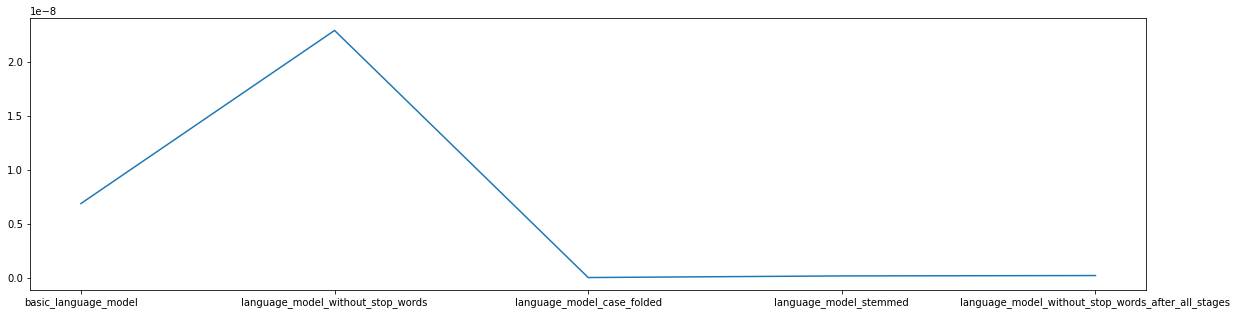

In [26]:
plt.figure(figsize=(20,5))
plt.plot(list(res['Museum'].keys()),probs)

In [27]:
class LanguageModelDetails:
    name:str
    amount_of_words_in_collection:int
    collection:List[str]
    lm:Dict[str,float]
    
    def __init__(self,name:str,collection:List[str],lm:Dict[str,float]):
        self.name=name
        self.collection=collection
        self.lm=lm
        self.amount_of_words_in_collection=0
        for doc in collection:
            self.amount_of_words_in_collection+=len(doc.split())
    
    def get_lm_size(self):
        return len(self.lm)
    
        

In [28]:
#TODO: change the code to use this class

In [36]:
basic=LanguageModelDetails("basic",collection,basic_language_model)
stop_words_details=LanguageModelDetails("stopwords",collection_without_stop_words,language_model_without_stop_words)
case_folded=LanguageModelDetails("case_folded",collection_case_folded,language_model_case_folded)
stemmed=LanguageModelDetails("stemmed",collection_stemmed,language_model_stemmed)
after_all_stages=LanguageModelDetails("after_all_stages",collection_without_stop_words_after_all_stages,language_model_without_stop_words_after_all_stages)
objects=[basic,stop_words,case_folded,stemmed,after_all_stages]

In [30]:
for obj in objects:
    print(f"{obj.name} has {obj.get_lm_size()} words in the language model, and {obj.amount_of_words_in_collection} words in the collection\n")

basic has 41121 words in the language model, and 351168 words in the collection

stopwords has 41021 words in the language model, and 235258 words in the collection

case_folded has 31166 words in the language model, and 45989 words in the collection

stemmed has 26902 words in the language model, and 45989 words in the collection

after_all_stages has 26544 words in the language model, and 43482 words in the collection



In [31]:
import pandas as pd


In [32]:
data={}
for obj in objects:
    data[obj.name]=[obj.get_lm_size(),obj.amount_of_words_in_collection]
df=pd.DataFrame.from_dict(data,columns=["Dictionary size","amount_of_words_in_collection"],orient="index")


In [33]:
df

,Dictionary size,amount_of_words_in_collection
basic,41121,351168
stopwords,41021,235258
case_folded,31166,45989
stemmed,26902,45989
after_all_stages,26544,43482


In [38]:
# כמה מילות עצירה קיימת במאגר המקורי
counter=0
for doc in collection:
    for word in doc.split():
        if word in stop_words:
            counter+=1
counter

137163